<a href="https://colab.research.google.com/github/dev02chandan/recommendation-systems/blob/main/User_User_Based_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim:
Perform User-User Based Collaborative Filtering using given data.

# Intro

User-based collaborative filtering is also called user-user collaborative filtering. It is a type of recommendation system algorithm that uses user similarity to make product recommendations.




# User-Based Collaborative Filtering Recommendation Algorithm



User-based collaborative filtering makes recommendations based on user-product interactions in the past. The assumption behind the algorithm is that similar users like similar products.

User-based collaborative filtering algorithm usually has the following steps:

1. Find similar users based on interactions with common items.
2. Identify the items rated high by similar users but have not been exposed to the active user of interest.
3. Calculate the weighted average score for each item.
4. Rank items based on the score and pick top n items to recommend.

# Step 1: Import Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Download And Read In Data

This experiment uses the movielens dataset. This dataset contains actual user ratings of movies.



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

There are multiple datasets in the 100k movielens folder. For this experiment, we will use two ratings and movies.



In [ ]:
movies = pd.read_csv('3movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
links = pd.read_csv('3links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [ ]:
tags = pd.read_csv('3tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
ratings = pd.read_csv('3ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


There are four columns in the ratings dataset, userID, movieID, rating, and timestamp.

The dataset has over 100k records, and there is no missing data.

In [ ]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


The 100k ratings are from 610 users on 9724 movies. The rating has ten unique values from 0.5 to 5.

In [ ]:
# Print Number of users
print(ratings.nunique())

# Print Number of movies


# Print Number of ratings


# Print List of unique ratings


userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64


 read in the movies data to get the movie names.



In [ ]:
# Read in data
movies

# Take a look at the data


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Using 'movieID' as the matching key, we appended movie information to the rating dataset and named it 'df'. So now we have the movie tile and movie rating in the same dataset!


In [ ]:
# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId')
df

# Take a look at the data


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


# Step 3: Exploratory Data Analysis (EDA)

In step 3, we need to filter the movies and keep only those with over 100 ratings for the analysis.

First group the movies by title, count the number of ratings, and keep only the movies with greater than 100 ratings.

The average ratings for the movies are calculated as well.

From the `.info()` output, check how many movies left?

In [ ]:
# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


check what the most popular movies and their ratings are.

In [ ]:
# Check popular movies
mean = agg_ratings_GT100['mean_rating'].mean()
mean

3.8200591733105504

In [ ]:
# counting the number of movies above a rating of 4
(agg_ratings_GT100['mean_rating']>4).sum()

46

In [ ]:
(agg_ratings_GT100['mean_rating']>4.25).sum()

5

In [ ]:
# Top 20 Popular movies with ratings
sorted_ratings = agg_ratings_GT100.sort_values(by='mean_rating', ascending=False)
sorted_ratings.head(20)

,title,mean_rating,number_of_ratings
7593,"Shawshank Redemption, The (1994)",4.429022,317
3499,"Godfather, The (1972)",4.289062,192
3011,Fight Club (1999),4.272936,218
3500,"Godfather: Part II, The (1974)",4.259690,129
2334,"Departed, The (2006)",4.252336,107
3564,Goodfellas (1990),4.250000,126
2163,"Dark Knight, The (2008)",4.238255,149
9119,"Usual Suspects, The (1995)",4.237745,204
6808,"Princess Bride, The (1987)",4.232394,142
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251


**Inference:**

* We observe here that Shawshank Redemption is a very popular movie with a mean rating of 4.42 (which is much higher than the second movie)

* Another observation is that most number of popular movies are from the 20th Century

Use a `jointplot` to check the correlation between the average rating and the number of ratings.



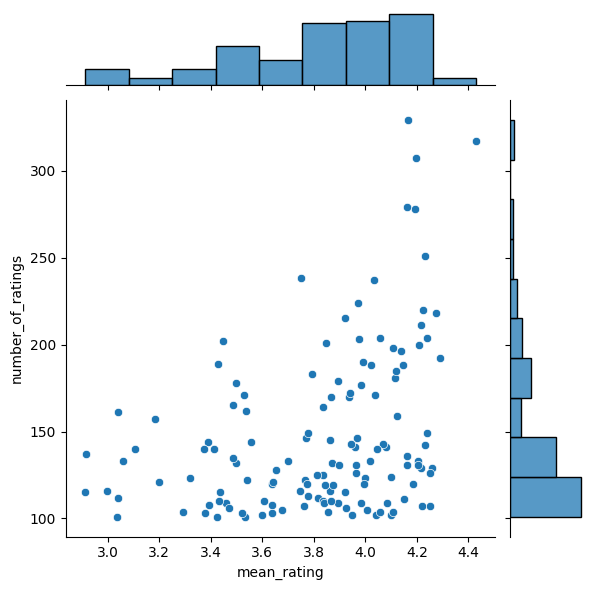

In [ ]:
# Visulization and write the inferences
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

**Inference:**

* The mean rating and number of ratings have a *positive correlation*.

* As the number of ratings increase, the mean rating of the movie increases.

* Also, the scatter plot is dense around the 100 ratings mark and gets sparse as the number of ratings increase


To keep only the 134 movies with more than 100 ratings, we need to join the movie with the user-rating level dataframe.

`how='inner'` and `on='title'` ensure that only the movies with more than 100 ratings are included.

In [ ]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [ ]:
agg_ratings_GT100.columns

Index(['title', 'mean_rating', 'number_of_ratings'], dtype='object')

In [ ]:
# Merge data
df_merged = pd.merge(df, agg_ratings_GT100['title'], how='inner', on='title')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19788 entries, 0 to 19787
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     19788 non-null  int64  
 1   movieId    19788 non-null  int64  
 2   rating     19788 non-null  float64
 3   timestamp  19788 non-null  int64  
 4   title      19788 non-null  object 
 5   genres     19788 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
df_merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


After filtering the movies with over 100 ratings, we have 597 users that rated 134 movies.

In [ ]:
# Number of users
df_merged.nunique()

# Number of movies


# Number of ratings


# List of unique ratings


userId         597
movieId        134
rating          10
timestamp    17217
title          134
genres          84
dtype: int64

# Step 4: Create User-Movie Matrix

In step 4, we will transform the dataset into a matrix format. The rows of the matrix are users, and the columns of the matrix are movies. The value of the matrix is the user rating of the movie if there is a rating. Otherwise, it shows 'NaN'.

In [ ]:
# Create user-item matrix
matrix = df_merged.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


# Step 5: Data Normalization

Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

After normalization, the movies with a rating less than the user's average rating get a negative value, and the movies with a rating more than the user's average rating get a positive value.

In [ ]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


# Step 6: Identify Similar Users

There are different ways to measure similarities. Pearson correlation and cosine similarity are two widely used methods.

In this tutorial, we will calculate the user similarity matrix using Pearson correlation.

In [ ]:
user_item_matrix = matrix_norm
item_user_matrix = user_item_matrix.T

In [ ]:
# Calculate the user-user similarity matrix using Pearson correlation coefficient
user_user_similarity_pearson = item_user_matrix.corr(method='pearson')

In [ ]:
user_user_similarity_pearson

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.000000,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.303854,0.583333,NaN,0.021898,0.377341,-0.468008,0.154338,0.309634,-0.262613,-0.584677,...,0.411419,0.211316,0.304117,0.600640,0.129249,1.000000,0.066328,0.410455,0.738371,0.190550
607,-0.012077,NaN,NaN,-0.020659,0.228218,0.541386,0.374808,0.281876,NaN,-1.000000,...,0.640257,0.300075,0.049099,-0.034091,-0.027678,0.066328,1.000000,0.037195,0.190117,0.013792
608,0.242309,-0.229416,NaN,-0.286872,0.263139,-0.337129,0.058785,0.362413,0.073324,-0.544342,...,0.471812,0.366453,0.308547,0.226134,0.059129,0.410455,0.037195,1.000000,0.503937,0.103155


In [ ]:
# User similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.        ,  0.        , ...,  0.14893867,
        -0.06003146,  0.04528224],
       [ 0.        ,  1.        ,  0.        , ..., -0.04485403,
        -0.25197632,  0.18886414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14893867, -0.04485403,  0.        , ...,  1.        ,
         0.14734568,  0.07931015],
       [-0.06003146, -0.25197632,  0.        , ...,  0.14734568,
         1.        , -0.14276787],
       [ 0.04528224,  0.18886414,  0.        , ...,  0.07931015,
        -0.14276787,  1.        ]])

Now let's use user ID 1 as an example to illustrate how to find similar users.

We first need to exclude user ID 1 from the similar user list and decide the number of similar users.



# Using Pearson's coefficient
## Step 7-9

## Step 6

In [ ]:
user_similarity = user_user_similarity_pearson

In [ ]:
type(user_user_similarity_pearson)

pandas.core.frame.DataFrame

In [ ]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582
6,-0.439941,NaN,NaN,0.421927,-0.006888,1.000000,0.000000,-0.127385,NaN,0.957427,...,-0.292770,-0.030599,-0.123983,-0.176327,0.063861,-0.468008,0.541386,-0.337129,0.158255,-0.030567


In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

`n = 10` means we would like to pick the top 10 most similar users for user ID 1.

The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the `user_similarity_threshold` to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value.



In [ ]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are userId
108    1.000000
9      1.000000
550    1.000000
598    1.000000
502    1.000000
401    0.942809
511    0.925820
366    0.872872
154    0.866025
595    0.866025
Name: 1, dtype: float64


## Step 7: Narrow Down Item Pool

In [ ]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


To keep only the similar users' movies, we keep the user IDs in the top 10 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.


In [ ]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,Aladdin (1992),Alien (1979),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Back to the Future (1985),Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)",Braveheart (1995),...,Shrek (2001),"Silence of the Lambs, The (1991)",Spider-Man (2002),Star Wars: Episode I - The Phantom Menace (1999),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,0.466667,0.466667,NaN,0.466667,NaN,0.466667,NaN,NaN,...,NaN,NaN,0.466667,NaN,NaN,-0.533333,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN,NaN
366,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,...,0.117647,NaN,NaN,NaN,NaN,NaN,0.117647,0.617647,NaN,0.617647
502,NaN,-0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.153846,-0.653846,NaN,NaN,NaN,-0.153846,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,0.222222,NaN,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.333333,NaN,NaN,NaN,NaN,0.666667,NaN


Next, we will drop the movies that user ID 1 watched from the similar user movie list. `errors='ignore'` drops columns if they exist without giving an error message.

In [ ]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

title,Aladdin (1992),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)","Breakfast Club, The (1985)",Catch Me If You Can (2002),"Dark Knight, The (2008)",...,"Monsters, Inc. (2001)",Ocean's Eleven (2001),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Shawshank Redemption, The (1994)",Shrek (2001),Spider-Man (2002),Terminator 2: Judgment Day (1991),Titanic (1997),Up (2009),WALL·E (2008)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,0.466667,NaN,0.466667,NaN,0.466667,NaN,-0.533333,0.466667,NaN,...,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,-0.533333,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN
366,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,-0.205882,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,NaN,NaN,...,0.117647,NaN,0.117647,NaN,0.117647,NaN,NaN,NaN,0.617647,0.617647
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.125000,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.346154,NaN,-1.153846,NaN,NaN,-0.153846,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,-0.277778,...,NaN,NaN,NaN,0.222222,NaN,NaN,NaN,NaN,0.222222,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 8: Recommend Items

In step 8, we will decide which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [ ]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
16,Harry Potter and the Chamber of Secrets (2002),1.888889
13,Eternal Sunshine of the Spotless Mind (2004),1.888889
6,"Bourne Identity, The (2002)",0.888889
29,Ocean's Eleven (2001),0.888889
18,Inception (2010),0.587491
3,"Beautiful Mind, A (2001)",0.466667
5,Blade Runner (1982),0.466667
12,Donnie Darko (2001),0.466667
10,"Departed, The (2006)",0.256727
31,"Shawshank Redemption, The (1994)",0.222566


## Step 9: Predict Scores

If the goal is to choose the recommended items, having the rank of the items is enough. However, if the goal is to predict the user's rating, we need to add the user's average movie rating score back to the movie score.

In [ ]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 1 is 4.39


The average movie rating for user 1 is 4.39, so we add 4.39 back to the movie score.

In [ ]:
type(ranked_item_score)

pandas.core.frame.DataFrame

In [ ]:
ranked_item_score['predicted_score'] = ranked_item_score['movie_score'].add(avg_rating)

In [ ]:
ranked_item_score

,movie,movie_score,predicted_score
16,Harry Potter and the Chamber of Secrets (2002),1.888889,6.281746
13,Eternal Sunshine of the Spotless Mind (2004),1.888889,6.281746
6,"Bourne Identity, The (2002)",0.888889,5.281746
29,Ocean's Eleven (2001),0.888889,5.281746
18,Inception (2010),0.587491,4.980348
3,"Beautiful Mind, A (2001)",0.466667,4.859524
5,Blade Runner (1982),0.466667,4.859524
12,Donnie Darko (2001),0.466667,4.859524
10,"Departed, The (2006)",0.256727,4.649584
31,"Shawshank Redemption, The (1994)",0.222566,4.615423


# Using Cosine coefficient
## Step 7-9

## Step: 6

In [ ]:
type(user_similarity_cosine)

numpy.ndarray

In [ ]:
user_similarity = pd.DataFrame(user_similarity_cosine)

In [ ]:
user_similarity

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,590,591,592,593,594,595,596
0,1.000000,0.000000,0.0,0.214476,0.012798,-0.232657,-0.010224,0.122712,0.206206,-0.030028,...,0.002630,0.013559,0.061819,-0.117250,0.265748,0.203808,-0.005283,0.148939,-0.060031,0.045282
1,0.000000,1.000000,0.0,-0.123490,0.083309,-0.136219,0.000000,-0.179540,0.000000,0.088336,...,-0.138510,-0.139560,-0.027479,0.000000,0.000000,0.085697,-0.137769,-0.044854,-0.251976,0.188864
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.214476,-0.123490,0.0,1.000000,-0.090876,0.129782,0.180992,0.012485,-0.014014,0.198644,...,-0.050485,0.101052,0.081233,-0.053397,0.220481,-0.000122,-0.041244,-0.135687,-0.029964,-0.003914
4,0.012798,0.083309,0.0,-0.090876,1.000000,-0.005365,0.052160,0.027705,0.000000,-0.097509,...,0.023611,0.139610,0.043973,0.038882,-0.149112,0.091400,0.097558,0.104978,0.194176,-0.003557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.203808,0.085697,0.0,-0.000122,0.091400,-0.186623,0.081675,0.096162,-0.043216,-0.179224,...,0.178680,0.040286,0.221050,0.119127,0.063173,1.000000,0.027906,0.334090,0.187060,0.138726
593,-0.005283,-0.137769,0.0,-0.041244,0.097558,0.231856,0.094840,0.096589,-0.039853,-0.045115,...,0.085591,0.128144,0.032739,-0.015860,0.003147,0.027906,1.000000,0.022788,0.040237,0.008854
594,0.148939,-0.044854,0.0,-0.135687,0.104978,-0.174824,0.032531,0.206986,0.017513,-0.215960,...,0.144712,0.207220,0.224817,0.089361,0.035724,0.334090,0.022788,1.000000,0.147346,0.079310
595,-0.060031,-0.251976,0.0,-0.029964,0.194176,0.094547,0.036102,0.061691,0.000000,-0.077905,...,0.082152,0.088189,0.023369,0.267198,-0.185748,0.187060,0.040237,0.147346,1.000000,-0.142768


In [ ]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,590,591,592,593,594,595,596
0,1.000000,0.000000,0.0,0.214476,0.012798,-0.232657,-0.010224,0.122712,0.206206,-0.030028,...,0.002630,0.013559,0.061819,-0.117250,0.265748,0.203808,-0.005283,0.148939,-0.060031,0.045282
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.214476,-0.123490,0.0,1.000000,-0.090876,0.129782,0.180992,0.012485,-0.014014,0.198644,...,-0.050485,0.101052,0.081233,-0.053397,0.220481,-0.000122,-0.041244,-0.135687,-0.029964,-0.003914
4,0.012798,0.083309,0.0,-0.090876,1.000000,-0.005365,0.052160,0.027705,0.000000,-0.097509,...,0.023611,0.139610,0.043973,0.038882,-0.149112,0.091400,0.097558,0.104978,0.194176,-0.003557
5,-0.232657,-0.136219,0.0,0.129782,-0.005365,1.000000,0.002610,-0.106690,0.000000,0.123600,...,-0.061559,-0.025583,-0.029180,-0.102809,-0.031204,-0.186623,0.231856,-0.174824,0.094547,0.001847


In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

`n = 10` means we would like to pick the top 10 most similar users for user ID 1.

The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the `user_similarity_threshold` to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then printed out the most similar users' ID and the Pearson correlation value.



In [ ]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are 183    0.343473
58     0.319505
Name: 1, dtype: float64


## Step 7: Narrow Down Item Pool

In [ ]:
# Movies that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


To keep only the similar users' movies, we keep the user IDs in the top 10 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.


In [ ]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),Apollo 13 (1995),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),Braveheart (1995),Clear and Present Danger (1994),...,Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
58,-3.069767,0.930233,NaN,NaN,-0.069767,-1.069767,-1.069767,0.930233,0.930233,-1.069767,...,NaN,NaN,-0.069767,-1.069767,0.930233,-1.069767,0.930233,-0.069767,0.930233,NaN
183,NaN,NaN,0.0,1.0,NaN,-1.000000,NaN,NaN,1.000000,NaN,...,0.0,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-2.0


Next, we will drop the movies that user ID 1 watched from the similar user movie list. `errors='ignore'` drops columns if they exist without giving an error message.

In [ ]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),Aliens (1986),Apollo 13 (1995),Batman Forever (1995),Beauty and the Beast (1991),Clueless (1995),Crimson Tide (1995),Die Hard (1988),Die Hard: With a Vengeance (1995),...,"Net, The (1995)",Outbreak (1995),Pretty Woman (1990),"Shawshank Redemption, The (1994)",Sleepless in Seattle (1993),Speed (1994),Terminator 2: Judgment Day (1991),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Waterworld (1995)
userId,,,,,,,,,,,,,,,,,,,,,
58,-3.069767,0.930233,NaN,-0.069767,-1.069767,0.930233,0.930233,-0.069767,NaN,-0.069767,...,-1.069767,-0.069767,0.930233,0.930233,0.930233,0.930233,-0.069767,-1.069767,0.930233,-0.069767
183,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN


## Step 8: Recommend Items

In step 8, we will decide which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [ ]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
2,Aliens (1986),0.343473
23,Speed (1994),0.320344
1,Aladdin (1992),0.297214
22,Sleepless in Seattle (1993),0.297214
21,"Shawshank Redemption, The (1994)",0.297214
5,Beauty and the Beast (1991),0.297214
6,Clueless (1995),0.297214
20,Pretty Woman (1990),0.297214
26,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.297214
17,Léon: The Professional (a.k.a. The Professiona...,0.297214


## Step 9: Predict Scores

If the goal is to choose the recommended items, having the rank of the items is enough. However, if the goal is to predict the user's rating, we need to add the user's average movie rating score back to the movie score.

In [ ]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 1 is 4.39


The average movie rating for user 1 is 4.39, so we add 4.39 back to the movie score.

In [ ]:
type(ranked_item_score)

pandas.core.frame.DataFrame

In [ ]:
ranked_item_score['predicted_score'] = ranked_item_score['movie_score'].add(avg_rating)

In [ ]:
ranked_item_score

,movie,movie_score,predicted_score
2,Aliens (1986),0.343473,4.736330
23,Speed (1994),0.320344,4.713201
1,Aladdin (1992),0.297214,4.690071
22,Sleepless in Seattle (1993),0.297214,4.690071
21,"Shawshank Redemption, The (1994)",0.297214,4.690071
5,Beauty and the Beast (1991),0.297214,4.690071
6,Clueless (1995),0.297214,4.690071
20,Pretty Woman (1990),0.297214,4.690071
26,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.297214,4.690071
17,Léon: The Professional (a.k.a. The Professiona...,0.297214,4.690071


# Write the Summary

1. We began with 4 csv files which had links to imdb id's, movies with their genres, tags based on the movie and most importantly, their ratings.

2. `User based collaborative filtering` is a process of finding n users similar to a the target user. This helps us approximate the value that the target user will give us for a particular item.

3. While performing EDA - one of the many observations was that the number of ratings of a particular movie and the rating for a movie had a positive correlation.

4. Further, we formed a matrix of users and movies and normalised it for accurate predictions

5. We used cosine similarity and pearson's coefficient to find similarity between User 1 and other users.

6. Further we remove the movies that none of the similar users have watched to narrow down the item pool.

7. We finally find the best movie recommendation for the user through an iterative process. Lastly, we added the mean for getting the approximate rating that would have been given by the target user.

To conclude, we performed User-User based Collaborative filtering recommendation system in detail which gives a practical view of the process.


Source: https://grabngoinfo.com/recommendation-system-user-based-collaborative-filtering/
